In [ ]:
#pip install -r requirements.txt

#!pip install regex, demoji, plotly, wordcloud

In [1]:
import pandas as pd
import re
import regex
import demoji
import numpy as np
from collections import Counter
import plotly.express as px
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

### Paso 1: Definir funciones necesarias

In [2]:
# Patron regex para identificar el comienzo de cada línea del txt con la fecha y la hora
def IniciaConFechaYHora(s):
    # Ejemplo: '9/16/23, 5:59 PM - ...'
    patron = '^([1-9]|1[0-2])(\/)([1-9]|1[0-9]|2[0-9]|3[0-1])(\/)(2[0-9]), ([0-9]+):([0-9][0-9])\s?([AP][M]) -'
    resultado = re.match(patron, s)  # Verificar si cada línea del txt hace match con el patrón de fecha y hora
    if resultado:
        return True
    return False

# Patrón para encontrar a los miembros del grupo dentro del txt
def EncontrarMiembro(s):
    patrones = ['Jhonsito 👨‍🎓:','Fresita ❤️:']

    patron = '^' + '|'.join(patrones)
    resultado = re.match(patron, s)  # Verificar si cada línea del txt hace match con el patrón de miembro
    if resultado:
        return True
    return False

# Separar las partes de cada línea del txt: Fecha, Hora, Miembro y Mensaje
def ObtenerPartes(linea):
    # Ejemplo: '9/16/23, 5:59 PM - Jhon Lima: Todos debemos aprender a analizar datos'
    splitLinea = linea.split(' - ')
    FechaHora = splitLinea[0]                     # '9/16/23, 5:59 PM'
    splitFechaHora = FechaHora.split(', ')
    Fecha = splitFechaHora[0]                    # '9/16/23'
    Hora = ' '.join(splitFechaHora[1:])          # '5:59 PM'
    Mensaje = ' '.join(splitLinea[1:])             # 'Jhon Lima: Todos debemos aprender a analizar datos'
    if EncontrarMiembro(Mensaje):
        splitMensaje = Mensaje.split(': ')
        Miembro = splitMensaje[0]               # 'Jhon Lima'
        Mensaje = ' '.join(splitMensaje[1:])    # 'Todos debemos aprender a analizar datos'
    else:
        Miembro = None       
    return Fecha, Hora, Miembro, Mensaje

### Paso 2: Obtener el dataframe usando el archivo txt y las funciones definidas

In [3]:
# Leer el archivo txt descargado del chat de WhatsApp
RutaChat = 'data/2_chat-with-Fresita❤️.txt'

# Lista para almacenar los datos (Fecha, Hora, Miembro, Mensaje) de cada línea del txt
DatosLista = []
with open(RutaChat, encoding="utf-8") as fp:
    fp.readline() # Eliminar primera fila relacionada al cifrado de extremo a extremo
    Fecha, Hora, Miembro = None, None, None
    while True:
        linea = fp.readline()
        if not linea:
            break
        linea = linea.strip()
        if IniciaConFechaYHora(linea): # Si cada línea del txt coincide con el patrón fecha y hora
            Fecha, Hora, Miembro, Mensaje = ObtenerPartes(linea) # Obtener datos de cada línea del txt
            DatosLista.append([Fecha, Hora, Miembro, Mensaje])

# Convertir la lista con los datos a dataframe
df = pd.DataFrame(DatosLista, columns=['Fecha', 'Hora', 'Miembro', 'Mensaje'])

# Cambiar la columna Fecha a formato datetime
df['Fecha'] = pd.to_datetime(df['Fecha'], format="%m/%d/%y")

# Eliminar los posibles campos vacíos del dataframe
# y lo que no son mensajes como cambiar el asunto del grupo o agregar a alguien
df = df.dropna()

# Resetear el índice
df.reset_index(drop=True, inplace=True)
df

,Fecha,Hora,Miembro,Mensaje
0,2023-09-20,10:27 PM,Jhonsito 👨‍🎓,"Así es Gaby, yo siempre te dí tu lugar y te ac..."
1,2023-09-21,10:24 PM,Fresita ❤️,Ya tuve el valor de decirle a mi papá sobre ti...
2,2023-09-21,10:24 PM,Jhonsito 👨‍🎓,"Hola Gabriela, buenas noches."
3,2023-09-21,10:25 PM,Jhonsito 👨‍🎓,"Me parece perfecto, y valoro tanto tu que conf..."
4,2023-09-21,10:25 PM,Jhonsito 👨‍🎓,"Perfecto, podemos conversarlo mañana."
...,...,...,...,...
14138,2024-04-12,9:05 AM,Jhonsito 👨‍🎓,tu sabes que jamás
14139,2024-04-12,9:06 AM,Jhonsito 👨‍🎓,Fresh oye
14140,2024-04-12,9:06 AM,Fresita ❤️,<Media omitted>
14141,2024-04-12,9:06 AM,Fresita ❤️,Modo fresh


#### Filtrar el chat por fecha de acuerdo a lo requerido

In [4]:
start_date = '2023-10-01'
end_date = '2024-04-12'

df = df[(df['Fecha'] >= start_date) & (df['Fecha'] <= end_date)]
df

,Fecha,Hora,Miembro,Mensaje
942,2023-10-01,7:48 PM,Jhonsito 👨‍🎓,https://vm.tiktok.com/ZMja6TVY3/
943,2023-10-01,7:48 PM,Jhonsito 👨‍🎓,Cuando ya no estemos 😂😂😂espero esa canción 🎶
944,2023-10-01,7:48 PM,Jhonsito 👨‍🎓,😂
945,2023-10-01,7:49 PM,Fresita ❤️,Obvio
946,2023-10-01,7:49 PM,Fresita ❤️,"Siempre esperaré que seas feliz, de corazón"
...,...,...,...,...
14138,2024-04-12,9:05 AM,Jhonsito 👨‍🎓,tu sabes que jamás
14139,2024-04-12,9:06 AM,Jhonsito 👨‍🎓,Fresh oye
14140,2024-04-12,9:06 AM,Fresita ❤️,<Media omitted>
14141,2024-04-12,9:06 AM,Fresita ❤️,Modo fresh


### Paso 3: Estadísticas de mensajes, multimedia, emojis y links

#### Total de mensajes, multimedia, emojis y links enviados

In [6]:
def ObtenerEmojis(Mensaje):
    emoji_lista = []
    data = regex.findall(r'\X', Mensaje)  # Obtener lista de caracteres de cada mensaje
    for caracter in data:
        if demoji.replace(caracter) != caracter:
            emoji_lista.append(caracter)
    return emoji_lista

# Obtener la cantidad total de mensajes
total_mensajes = df.shape[0]

# Obtener la cantidad de archivos multimedia enviados
multimedia_mensajes = df[df['Mensaje'] == '<Media omitted>'].shape[0]

# Obtener la cantidad de emojis enviados
df['Emojis'] = df['Mensaje'].apply(ObtenerEmojis) # Se agrega columna 'Emojis'
emojis = sum(df['Emojis'].str.len())

# Obtener la cantidad de links enviados
url_patron = r'(https?://\S+)'
df['URLs'] = df.Mensaje.apply(lambda x: len(re.findall(url_patron, x))) # Se agrega columna 'URLs'
links = sum(df['URLs'])

# Obtener la cantidad de encuestas
encuestas = df[df['Mensaje'] == 'POLL:'].shape[0]

# Todos los datos pasarlo a diccionario
estadistica_dict = {'Tipo': ['Mensajes', 'Multimedia', 'Emojis', 'Links', 'Encuestas'],
        'Cantidad': [total_mensajes, multimedia_mensajes, emojis, links, encuestas]
        }

#Convertir diccionario a dataframe
estadistica_df = pd.DataFrame(estadistica_dict, columns = ['Tipo', 'Cantidad'])

# Establecer la columna Tipo como índice
estadistica_df = estadistica_df.set_index('Tipo')
estadistica_df

C:\Users\JHON\AppData\Local\Temp\ipykernel_13316\2126388669.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Emojis'] = df['Mensaje'].apply(ObtenerEmojis) # Se agrega columna 'Emojis'
C:\Users\JHON\AppData\Local\Temp\ipykernel_13316\2126388669.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['URLs'] = df.Mensaje.apply(lambda x: len(re.findall(url_patron, x))) # Se agrega columna 'URLs'


,Cantidad
Tipo,
Mensajes,13201
Multimedia,3155
Emojis,3401
Links,93
Encuestas,0


#### Emojis más usados

In [21]:
# Obtener emojis más usados y las cantidades en el chat del grupo del dataframe
emojis_lista = list([a for b in df.Emojis for a in b])
emoji_dic = dict(Counter(emojis_lista))
emoji_dic = sorted(emoji_dic.items(), key=lambda x: x[1], reverse=True)

# Convertir el diccionario a dataframe
emoji_df = pd.DataFrame(emoji_dic, columns=['Emoji', 'Cantidad'])

# Añadir una columna de ID incremental
emoji_df = emoji_df.reset_index()
emoji_df['index'] = emoji_df['index'] + 1  # Hacer que los IDs empiecen en 1 en lugar de 0

# Renombrar las columnas
emoji_df = emoji_df.rename(columns={'index': 'ID', 'Emoji': 'Emoji', 'Cantidad': 'Cantidad'})

# Mostrar solo las primeras 10 filas
emoji_df = emoji_df.head(10)

print('Número de tipos emojis usados: ', len(emoji_df), '\n')
print(emoji_df)


Número de tipos emojis usados:  10 

   ID Emoji  Cantidad
0   1     🤣       852
1   2     😂       676
2   3     🥺       182
3   4     🥰       178
4   5    ❤️       145
5   6     🤭       104
6   7     🤤       101
7   8     😍        76
8   9     🥵        72
9  10     👀        67


In [8]:
# Plotear el pie de los emojis más usados
fig = px.pie(emoji_df, values='Cantidad', names=emoji_df.index, hole=.3, template='plotly_dark', color_discrete_sequence=px.colors.qualitative.Pastel2)
fig.update_traces(textposition='inside', textinfo='percent+label', textfont_size=20)
fig.update_layout(title={'text': '🤗 Emojis que más usamos', 'y':0.96, 'x':0.5, 'xanchor': 'center'}, font=dict(size=17))
fig.show()

### Paso 4: Estadísticas de los miembros del chat

#### Miembros más activos en el chat de whatsapp

In [9]:
# Determinar los miembros más activos del chat
df_mActivos = df.groupby('Miembro')['Mensaje'].count().sort_values(ascending=False).to_frame()
df_mActivos.reset_index(inplace=True)
df_mActivos.index = np.arange(1, len(df_mActivos)+1)
df_mActivos['% Mensaje'] = (df_mActivos['Mensaje'] / df_mActivos['Mensaje'].sum()) * 100
# Renombrar las columnas
df_mActivos = df_mActivos.rename(columns={'Miembro': 'Miembro', 'Mensaje': '# mensajes', '% Mensaje': '% Mensajes'})
df_mActivos

,Miembro,# mensajes,% Mensajes
1,Fresita ❤️,7986,60.495417
2,Jhonsito 👨‍🎓,5215,39.504583


#### Estadísticas por miembro

In [10]:
# Separar mensajes (sin multimedia) y multimedia (stickers, fotos, videos)
multimedia_df = df[df['Mensaje'] == '<Media omitted>']
mensajes_df = df.drop(multimedia_df.index)

# Contar la cantidad de palabras y letras por mensaje
mensajes_df['Letras'] = mensajes_df['Mensaje'].apply(lambda s : len(s))
mensajes_df['Palabras'] = mensajes_df['Mensaje'].apply(lambda s : len(s.split(' ')))
# El tail Por default mostrara solo 5 rows
mensajes_df.tail()

,Fecha,Hora,Miembro,Mensaje,Emojis,URLs,Letras,Palabras
14136,2024-04-12,9:02 AM,Fresita ❤️,Solo no me quedes mal mascota,[],0,29,6
14138,2024-04-12,9:05 AM,Jhonsito 👨‍🎓,tu sabes que jamás,[],0,18,4
14139,2024-04-12,9:06 AM,Jhonsito 👨‍🎓,Fresh oye,[],0,9,2
14141,2024-04-12,9:06 AM,Fresita ❤️,Modo fresh,[],0,10,2
14142,2024-04-12,9:08 AM,Jhonsito 👨‍🎓,asi me gusta amor,[],0,17,4


In [11]:
import json

# Obtener a todos los miembros
miembros = mensajes_df.Miembro.unique()

# Crear diccionario donde se almacenará todos los datos
dic = {}

for i in range(len(miembros)):
    lista = []
    # Filtrar mensajes de un miembro en específico
    miembro_df= mensajes_df[mensajes_df['Miembro'] == miembros[i]]

    # Agregar a la lista el número total de mensajes enviados
    lista.append(miembro_df.shape[0])
    
    # Agregar a la lista el número de palabras por total de mensajes (palabras por mensaje)
    palabras_por_msj = (np.sum(miembro_df['Palabras']))/miembro_df.shape[0]
    lista.append(palabras_por_msj)

    # Agregar a la lista el número de mensajes multimedia enviados
    multimedia = multimedia_df[multimedia_df['Miembro'] == miembros[i]].shape[0]
    lista.append(multimedia)

    # Agregar a la lista el número total de emojis enviados
    emojis = sum(miembro_df['Emojis'].str.len())
    lista.append(emojis)

    # Agregar a la lista el número total de links enviados
    links = sum(miembro_df['URLs'])
    lista.append(links)

    # Asignar la lista como valor a la llave del diccionario
    dic[miembros[i]] = lista

# Convertir el diccionario a una cadena JSON
json_str = json.dumps(dic, ensure_ascii=False)

print(json_str)
    
#print(dic)
# {'Jhonsito 👨‍🎓': [4138, 5.075640405993234, 1077, 2196, 60], 'Fresita ❤️': [5908, 5.175693974272173, 2078, 1205, 33]}

{"Jhonsito 👨‍🎓": [4138, 5.079023682938618, 1077, 2196, 60], "Fresita ❤️": [5908, 5.177555856465809, 2078, 1205, 33]}


In [12]:
# Convertir de diccionario a dataframe
miembro_stats_df = pd.DataFrame.from_dict(dic)

# Cambiar el índice por la columna agregada 'Estadísticas'
estadísticas = ['Mensajes', 'Palabras por mensaje', 'Multimedia', 'Emojis', 'Links']
miembro_stats_df['Miembro'] = estadísticas
miembro_stats_df.set_index('Miembro', inplace=True)

# Transponer el dataframe
miembro_stats_df = miembro_stats_df.T

#Convertir a integer las columnas Mensajes, Multimedia Emojis y Links
miembro_stats_df['Mensajes'] = miembro_stats_df['Mensajes'].apply(int)
miembro_stats_df['Multimedia'] = miembro_stats_df['Multimedia'].apply(int)
miembro_stats_df['Emojis'] = miembro_stats_df['Emojis'].apply(int)
miembro_stats_df['Links'] = miembro_stats_df['Links'].apply(int)
miembro_stats_df = miembro_stats_df.sort_values(by=['Mensajes'], ascending=False)
miembro_stats_df

Miembro,Mensajes,Palabras por mensaje,Multimedia,Emojis,Links
Fresita ❤️,5908,5.177556,2078,1205,33
Jhonsito 👨‍🎓,4138,5.079024,1077,2196,60


### Paso 5: Estadísticas del comportamiento del grupo

In [13]:
df['rangoHora'] = pd.to_datetime(df['Hora'], format='%I:%M %p')

# Define a function to create the "Range Hour" column
def create_range_hour(hour):
    hour = pd.to_datetime(hour)  # Convertir a objeto de Python datetime si es necesario
    start_hour = hour.hour
    end_hour = (hour + pd.Timedelta(hours=1)).hour
    return f'{start_hour:02d} - {end_hour:02d} h'

# # Apply the function to create the "Range Hour" column
df['rangoHora'] = df['rangoHora'].apply(create_range_hour)
df

C:\Users\JHON\AppData\Local\Temp\ipykernel_13316\981834853.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\JHON\AppData\Local\Temp\ipykernel_13316\981834853.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Fecha,Hora,Miembro,Mensaje,Emojis,URLs,rangoHora
942,2023-10-01,7:48 PM,Jhonsito 👨‍🎓,https://vm.tiktok.com/ZMja6TVY3/,[],1,19 - 20 h
943,2023-10-01,7:48 PM,Jhonsito 👨‍🎓,Cuando ya no estemos 😂😂😂espero esa canción 🎶,"[😂, 😂, 😂, 🎶]",0,19 - 20 h
944,2023-10-01,7:48 PM,Jhonsito 👨‍🎓,😂,[😂],0,19 - 20 h
945,2023-10-01,7:49 PM,Fresita ❤️,Obvio,[],0,19 - 20 h
946,2023-10-01,7:49 PM,Fresita ❤️,"Siempre esperaré que seas feliz, de corazón",[],0,19 - 20 h
...,...,...,...,...,...,...,...
14138,2024-04-12,9:05 AM,Jhonsito 👨‍🎓,tu sabes que jamás,[],0,09 - 10 h
14139,2024-04-12,9:06 AM,Jhonsito 👨‍🎓,Fresh oye,[],0,09 - 10 h
14140,2024-04-12,9:06 AM,Fresita ❤️,<Media omitted>,[],0,09 - 10 h
14141,2024-04-12,9:06 AM,Fresita ❤️,Modo fresh,[],0,09 - 10 h


In [14]:
df['DiaSemana'] = df['Fecha'].dt.strftime('%A')
mapeo_dias_espanol = {'Monday': 'Lunes','Tuesday': 'Martes','Wednesday': 'Miércoles','Thursday': 'Jueves',
                      'Friday': 'Viernes','Saturday': 'Sábado','Sunday': 'Domingo'}
df['DiaSemana'] = df['DiaSemana'].map(mapeo_dias_espanol)
df

# df['DiaSemana'] = df['Fecha'].dt.strftime('%A')
# mapeo_dias_espanol = {'Monday': '1 Lunes','Tuesday': '2 Martes','Wednesday': '3 Miércoles','Thursday': '4 Jueves',
#                       'Friday': '5 Viernes','Saturday': '6 Sábado','Sunday': '7 Domingo'}
# df['DiaSemana'] = df['DiaSemana'].map(mapeo_dias_espanol)
# df

C:\Users\JHON\AppData\Local\Temp\ipykernel_13316\3749245272.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\JHON\AppData\Local\Temp\ipykernel_13316\3749245272.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Fecha,Hora,Miembro,Mensaje,Emojis,URLs,rangoHora,DiaSemana
942,2023-10-01,7:48 PM,Jhonsito 👨‍🎓,https://vm.tiktok.com/ZMja6TVY3/,[],1,19 - 20 h,Domingo
943,2023-10-01,7:48 PM,Jhonsito 👨‍🎓,Cuando ya no estemos 😂😂😂espero esa canción 🎶,"[😂, 😂, 😂, 🎶]",0,19 - 20 h,Domingo
944,2023-10-01,7:48 PM,Jhonsito 👨‍🎓,😂,[😂],0,19 - 20 h,Domingo
945,2023-10-01,7:49 PM,Fresita ❤️,Obvio,[],0,19 - 20 h,Domingo
946,2023-10-01,7:49 PM,Fresita ❤️,"Siempre esperaré que seas feliz, de corazón",[],0,19 - 20 h,Domingo
...,...,...,...,...,...,...,...,...
14138,2024-04-12,9:05 AM,Jhonsito 👨‍🎓,tu sabes que jamás,[],0,09 - 10 h,Viernes
14139,2024-04-12,9:06 AM,Jhonsito 👨‍🎓,Fresh oye,[],0,09 - 10 h,Viernes
14140,2024-04-12,9:06 AM,Fresita ❤️,<Media omitted>,[],0,09 - 10 h,Viernes
14141,2024-04-12,9:06 AM,Fresita ❤️,Modo fresh,[],0,09 - 10 h,Viernes


#### Número de mensajes por rango de hora

In [15]:
# Crear una columna de 1 para realizar el conteo de mensajes
df['# Mensajes por hora'] = 1

# Sumar (contar) los mensajes que tengan la misma fecha
mensajes_hora = df.groupby('rangoHora').count().reset_index()

# Plotear la cantidad de mensajes respecto del tiempo
fig = px.line(mensajes_hora, x='rangoHora', y='# Mensajes por hora', color_discrete_sequence=['salmon'], template='plotly_dark')

# Ajustar el gráfico
fig.update_layout(
    title={'text': 'Mensajes con ella ❤️ por hora', 'y':0.96, 'x':0.5, 'xanchor': 'center'},
    font=dict(size=17))
fig.update_traces(mode='markers+lines', marker=dict(size=10))
fig.update_xaxes(title_text='Rango de hora', tickangle=30)
fig.update_yaxes(title_text='# Mensajes')
fig.show()

C:\Users\JHON\AppData\Local\Temp\ipykernel_13316\3375260800.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Número de mensajes por día

In [16]:
# Crear una columna de 1 para realizar el conteo de mensajes
df['# Mensajes por día'] = 1

# Sumar (contar) los mensajes que tengan la misma fecha
date_df = df.groupby('DiaSemana').count().reset_index()


# Plotear la cantidad de mensajes respecto del tiempo
fig = px.line(date_df, x='DiaSemana', y='# Mensajes por día', color_discrete_sequence=['salmon'], template='plotly_dark')

# Ajustar el gráfico
fig.update_layout(
    title={'text': 'Mensajes con ella ❤️ por día', 'y':0.96, 'x':0.5, 'xanchor': 'center'},
    font=dict(size=17))
fig.update_traces(mode='markers+lines', marker=dict(size=10))
fig.update_xaxes(title_text='Día', tickangle=30)
fig.update_yaxes(title_text='# Mensajes')
fig.show()

C:\Users\JHON\AppData\Local\Temp\ipykernel_13316\239596912.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Número de mensajes a través del tiempo

In [17]:
# Crear una columna de 1 para realizar el conteo de mensajes
df['# Mensajes por día'] = 1

# Sumar (contar) los mensajes que tengan la misma fecha
date_df = df.groupby('Fecha').sum().reset_index()

# Plotear la cantidad de mensajes respecto del tiempo
fig = px.line(date_df, x='Fecha', y='# Mensajes por día', color_discrete_sequence=['salmon'], template='plotly_dark')

# Ajustar el gráfico
fig.update_layout(
    title={'text': 'Mensajes con ella ❤️ a lo largo del tiempo', 'y':0.96, 'x':0.5, 'xanchor': 'center'},
    font=dict(size=17))
fig.update_xaxes(title_text='Fecha', tickangle=45, nticks=35)
fig.update_yaxes(title_text='# Mensajes')
fig.show()

C:\Users\JHON\AppData\Local\Temp\ipykernel_13316\2885617712.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\JHON\AppData\Local\Temp\ipykernel_13316\2885617712.py:5: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



#### Word Cloud de palabras más usadas

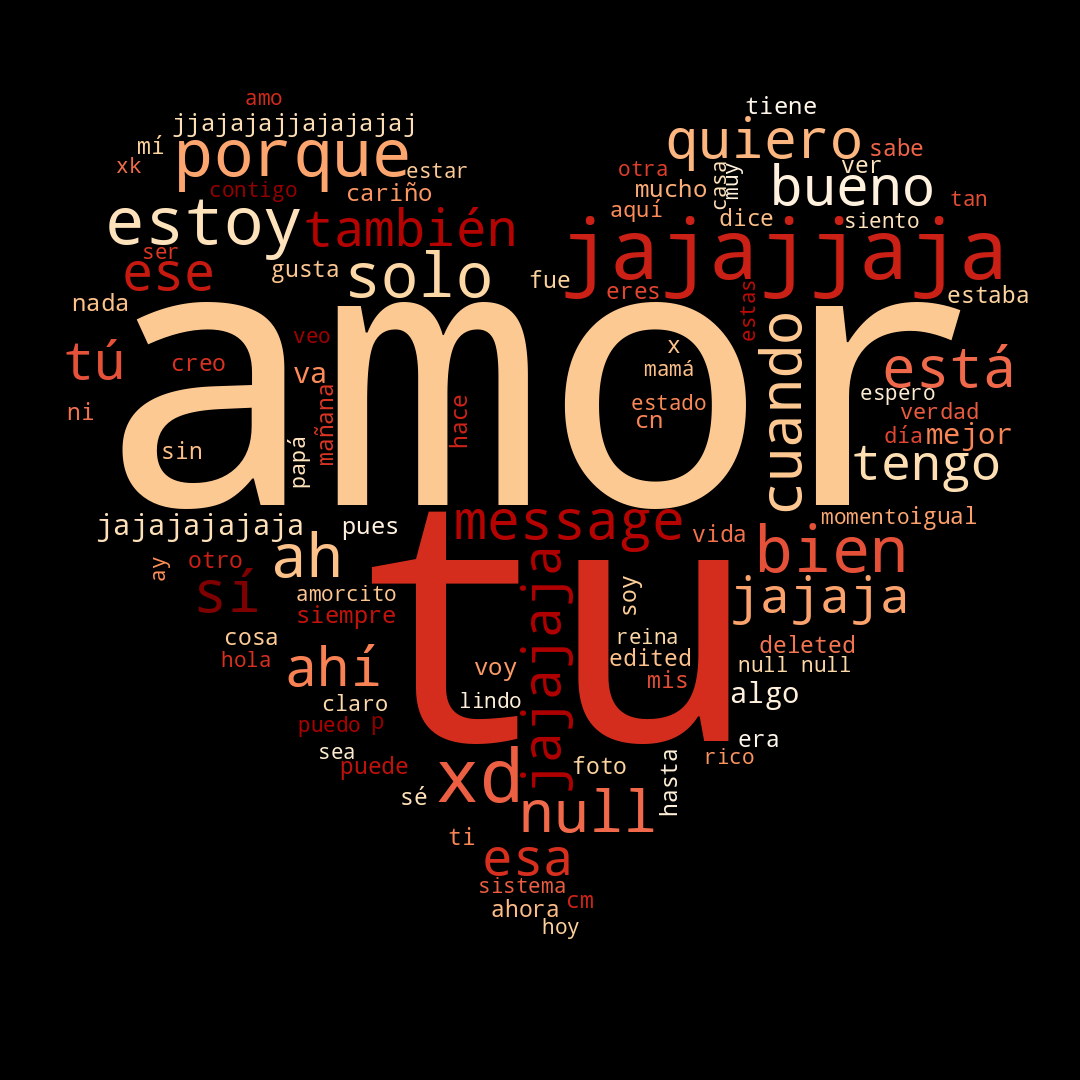

In [18]:
# Crear un string que contendrá todas las palabras
total_palabras = ' '
stopwords = STOPWORDS.update(['que', 'qué', 'con', 'de', 'te', 'en', 'la', 'lo', 'le', 'el', 'las', 'los', 'les', 'por', 'es',
                              'son', 'se', 'para', 'un', 'una', 'chicos', 'su', 'si', 'chic','nos', 'ya', 'hay', 'esta',
                              'pero', 'del', 'mas', 'más', 'eso', 'este', 'como', 'así', 'todo', 'https','Media','omitted',
                              'y', 'mi', 'o', 'q', 'yo', 'al', 'ok'])

mask = np.array(Image.open('resources/heart.jpg'))

# Obtener y acumular todas las palabras de cada mensaje
for mensaje in mensajes_df['Mensaje'].values:
    palabras = str(mensaje).lower().split() # Obtener las palabras de cada línea del txt
    for palabra in palabras:
        total_palabras = total_palabras + palabra + ' ' # Acumular todas las palabras

wordcloud = WordCloud(width = 800, height = 800, background_color ='black', stopwords = stopwords,
                      max_words=100, min_font_size = 5,
                      mask = mask, colormap='OrRd',).generate(total_palabras)

# Plotear la nube de palabras más usadas
wordcloud.to_image()